In [2]:
import pandas as pd

path="https://raw.githubusercontent.com/DeboraMandon/video_game_sales_analysis/main/vgsales.csv"
df=pd.read_csv(path, index_col=0)
df.head()

########## PART D

########## PART S

########## PART G

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# TYPE DE VARIABLE
########## PART D
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


In [4]:
var_cat=['Name', 'Platform','Genre', 'Publisher']
var_num=['Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

In [5]:
# TAUX DE NA
########## PART D
print(df.isna().sum())
#pourcentage de valeur nulle pour la variable Year
Year_Na=(df['Year'].isna().sum())/(len(df['Year']))
Year_Na=Year_Na*100
print('Year',round(Year_Na,2),'%')

#pourcentage de valeur nulle pour la variable Publisher
Year_Na=(df['Publisher'].isna().sum())/(len(df['Publisher']))
Year_Na=Year_Na*100
print('Publisher',round(Year_Na,2),'%')

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Year 1.63 %
Publisher 0.35 %


In [6]:
# DISTRIBUTION DES VALEURS
########## PART D
print(df.describe())
print(df.describe(include='O'))

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  
                               Name Platform   Genre        Publisher
count               

In [7]:
# ETENDUE DES VALEURS
########## PART D
print(df['Platform'].unique())
print(df['Year'].unique())
print(df['Genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [8]:
# RELATION ENTRE LES VALEURS
########## PART D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


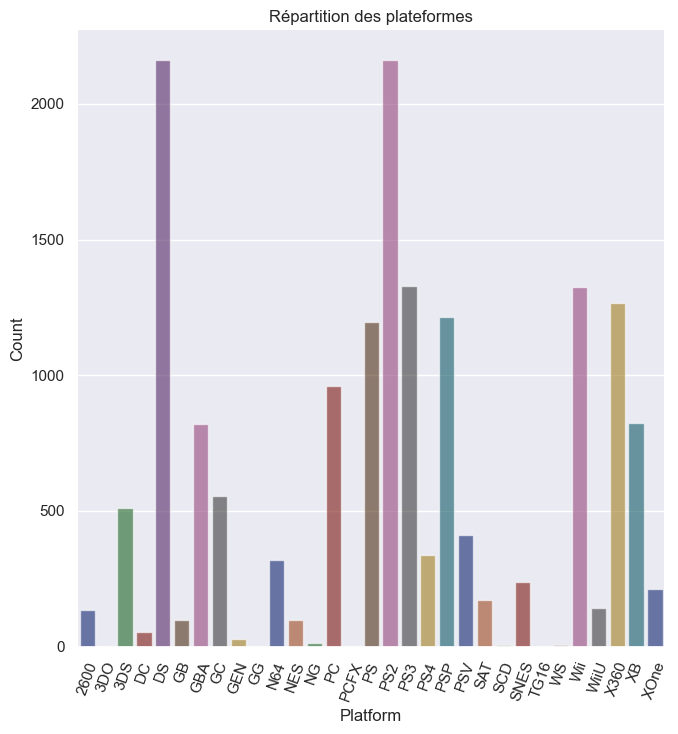

In [9]:
#PLATEFORMES

platform_count=df.groupby('Platform').agg('count')
platform_count.reset_index(inplace=True)
platform_count.drop(['Year', 'Genre','Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1, inplace=True)
platform_count=platform_count.rename(columns={'Platform':'Platform','Name':'Count'})

sns.set_theme(style="darkgrid")
g=sns.catplot(data=platform_count, kind="bar",x="Platform", y="Count", palette="dark", alpha=.6, height=7)
g.despine(left=True)
g.set_axis_labels("Platform", "Count")
g.set_xticklabels(rotation=70)
plt.title("Répartition des plateformes");

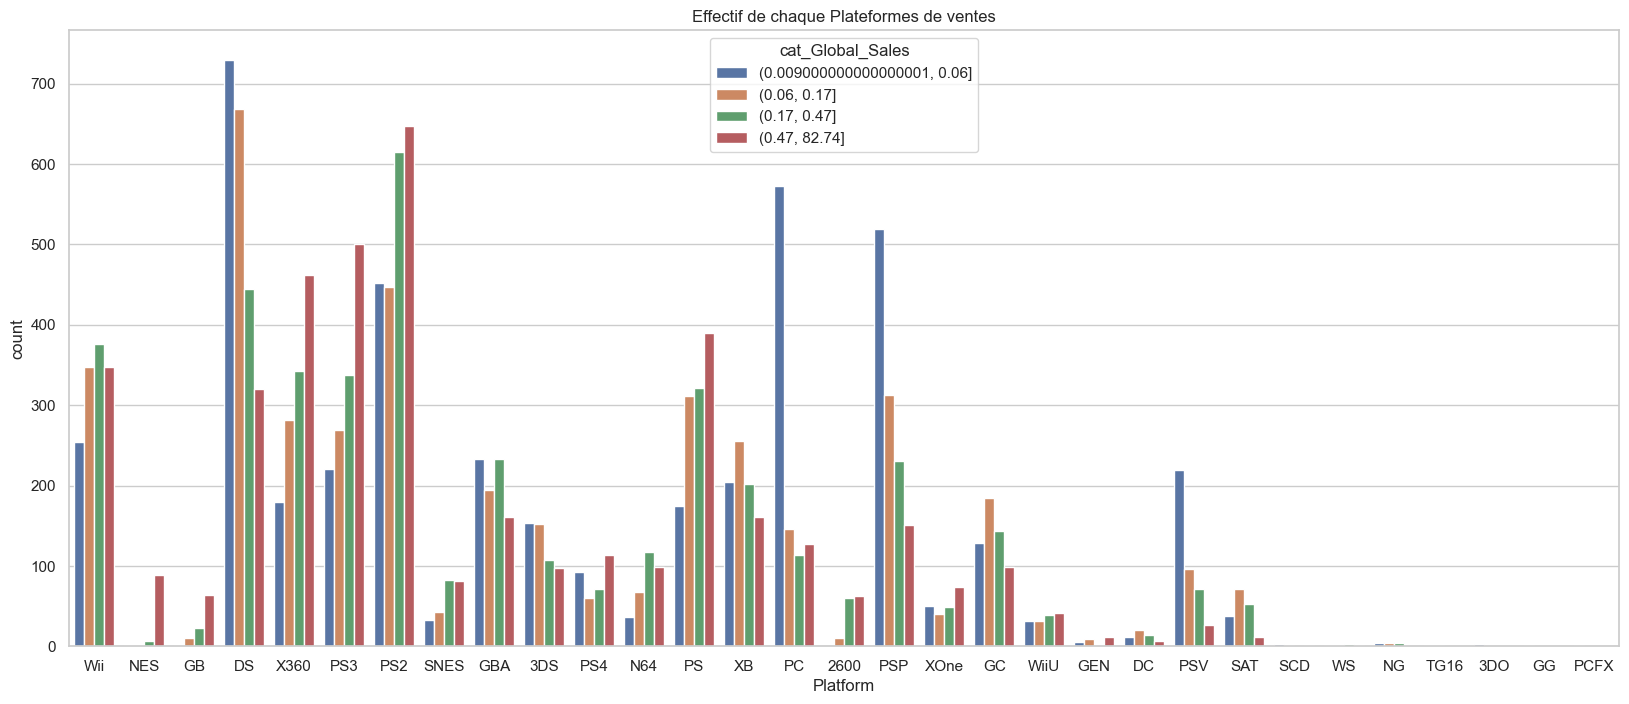

In [33]:
#PLATEFORMES

plt.figure(figsize=(20,8))
plt.title('Effectif de chaque Plateformes de ventes')

sns.countplot(x = 'Platform', hue = 'cat_Global_Sales', data = df);

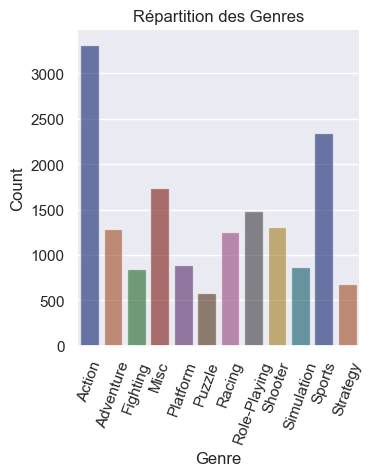

In [10]:
# GENRES

genre_count=df.groupby('Genre').agg('count')
genre_count.reset_index(inplace=True)
genre_count.drop(['Year', 'Platform','Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1, inplace=True)
genre_count=genre_count.rename(columns={'Genre':'Genre','Name':'Count'})

sns.set_theme(style="darkgrid")
g=sns.catplot(data=genre_count, kind="bar",x="Genre", y="Count", palette="dark", alpha=.6, height=4)
g.despine(left=True)
g.set_axis_labels("Genre", "Count")
g.set_xticklabels(rotation=70)
plt.title("Répartition des Genres");

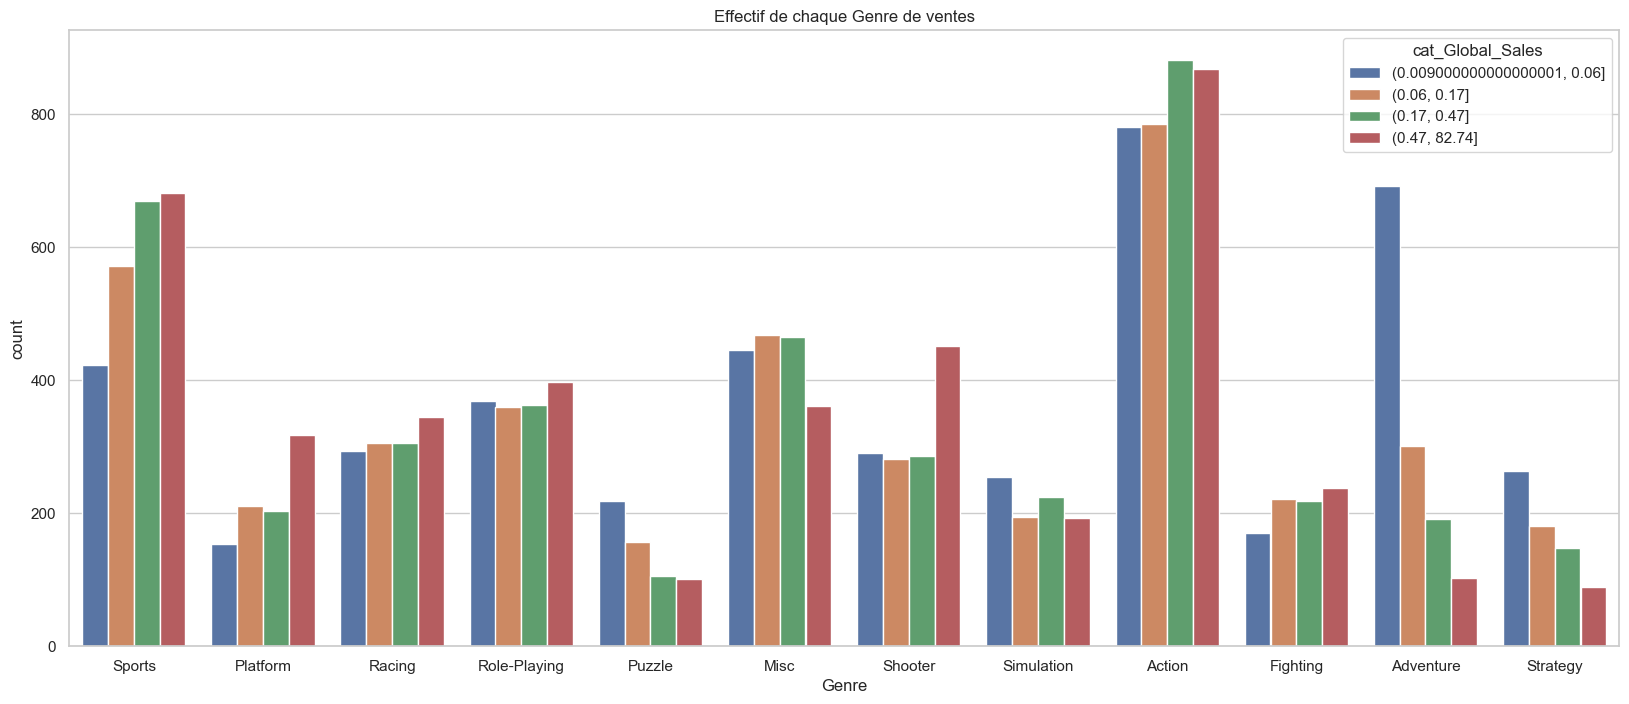

In [32]:
plt.figure(figsize=(20,8))
plt.title('Effectif de chaque Genre de ventes')

sns.countplot(x = 'Genre', hue = 'cat_Global_Sales', data = df);

Pourcentage des ventes du Genre qui se vend le plus: 1.96 %
Pourcentage des ventes du Genre qui se vend le plus: 19.63 %


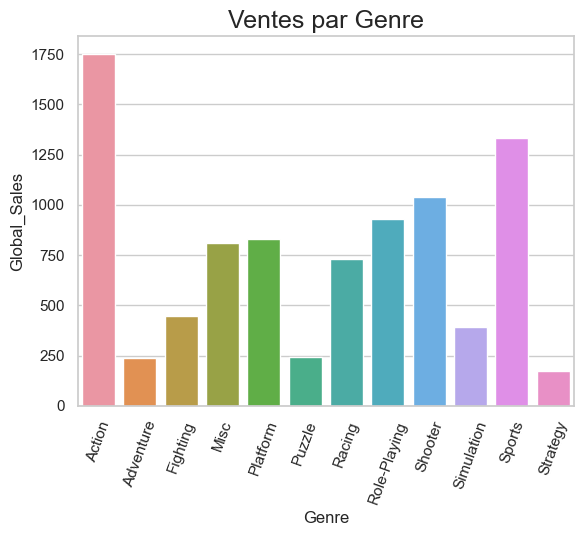

In [30]:
# AGGREGATION POUR ETUDE DES VENTES EN FONCTION DU GENRE

agg_genre=df.groupby(['Genre'], as_index=False).agg({'Global_Sales':'sum', 'NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum'})
agg_genre=agg_genre.sort_values(by='Genre', ascending=True)

plt.figure()
plt.title('Ventes par Genre', fontsize=18)
sns.barplot(x='Genre', y='Global_Sales', order=agg_genre['Genre'].values, data=agg_genre);
plt.xticks(rotation=70);

vente_best=0
for i in agg_genre['Genre'].iloc[-1:]:
    sale=agg_genre[agg_genre['Genre']==i]['Global_Sales'].sum()
    vente_best += sale

vente_worst=0
for i in agg_genre['Genre'].iloc[:1]:
    sale=agg_genre[agg_genre['Genre']==i]['Global_Sales'].sum()
    vente_worst += sale

vente_best_genre=vente_best/agg_genre.Global_Sales.sum()*100
vente_worst_genre=vente_worst/agg_genre.Global_Sales.sum()*100


print('Pourcentage des ventes du Genre qui se vend le plus:',round(vente_best_genre,2),'%')
print('Pourcentage des ventes du Genre qui se vend le plus:',round(vente_worst_genre,2),'%')

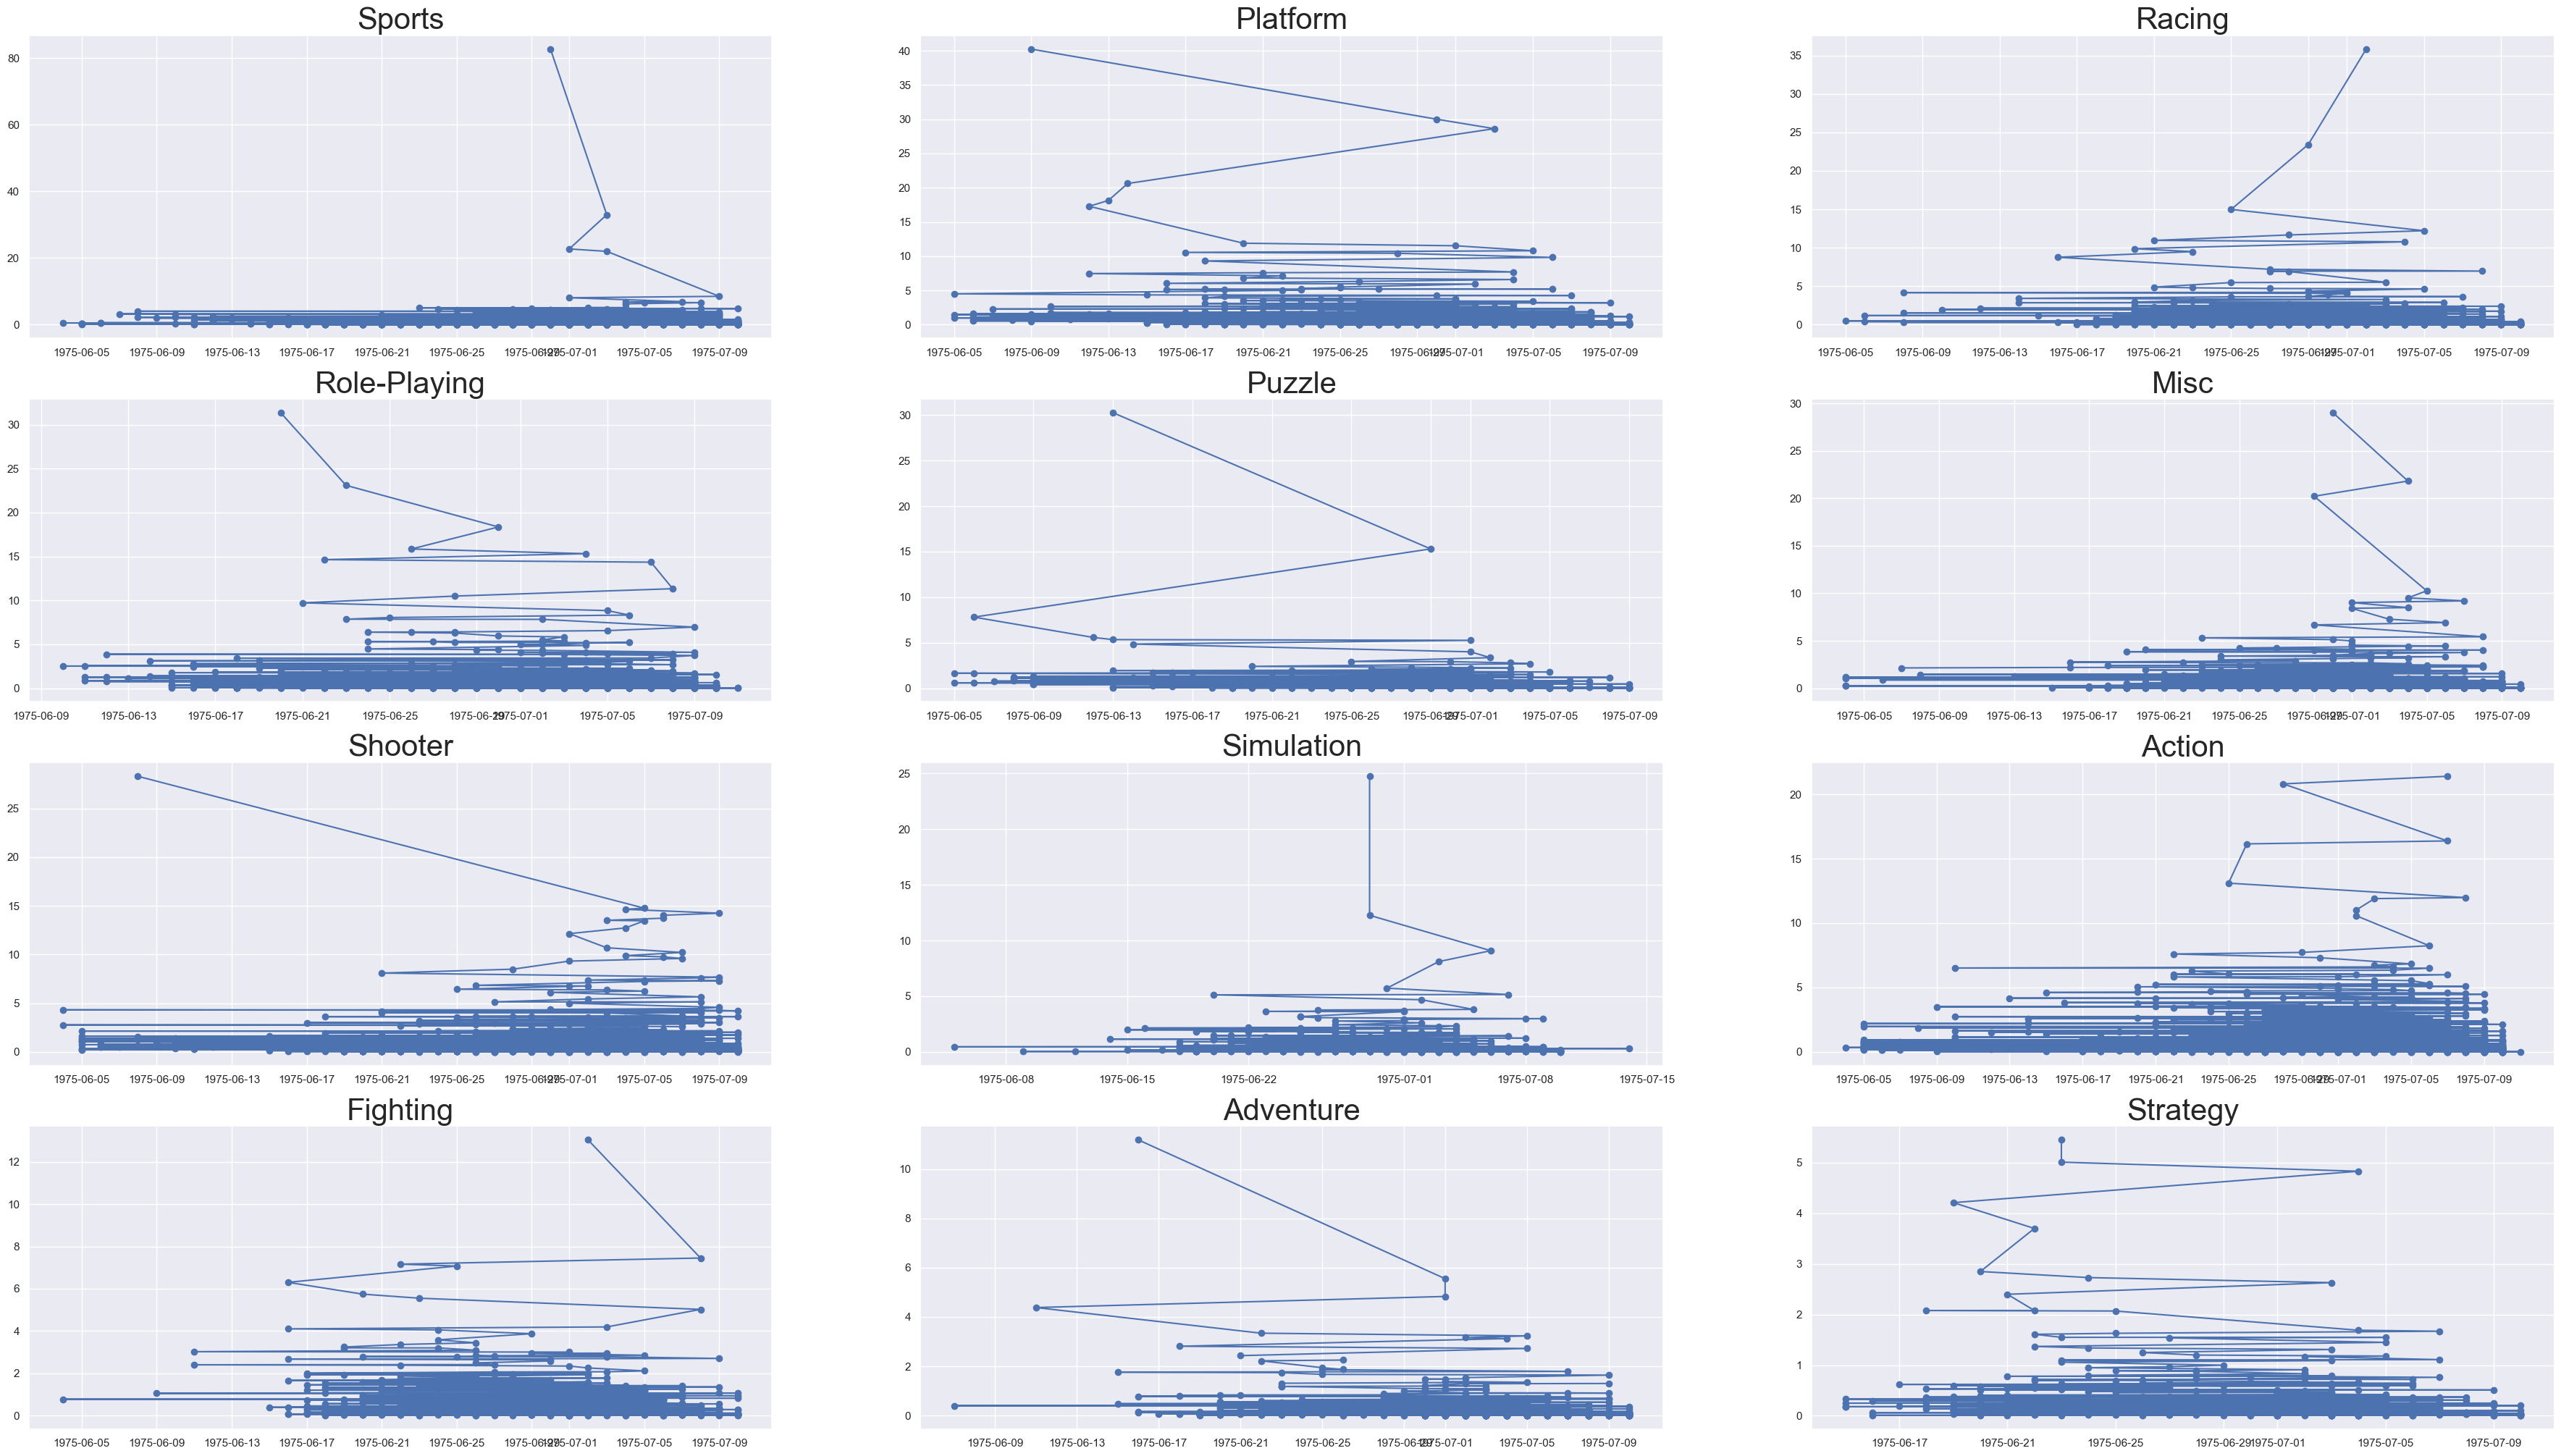

In [11]:
fig,ax=plt.subplots(4,3,figsize=(45,25))

coordonnees = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2)]

for i, j in zip(coordonnees, df['Genre'].unique()):
    ax[i[0], i[1]].plot_date(x=df[df['Genre']==j]['Year'].values,
                             y=df[df['Genre']==j]['Global_Sales'].values,
                             xdate=True,
                             ls='-')
    ax[i[0], i[1]].set_title(str(j), fontsize=30);

In [12]:
df['Year']

Rank
1        2006.0
2        1985.0
3        2008.0
4        2009.0
5        1996.0
          ...  
16596    2002.0
16597    2003.0
16598    2008.0
16599    2010.0
16600    2003.0
Name: Year, Length: 16598, dtype: float64

In [13]:
# ETUDE DES VARIABLES NUMERIQUES

for i in var_num:
    df['cat_'+i]=pd.qcut(df[i], q=[0,.25,.5,.75,1.], duplicates='drop')

df['Year']=pd.to_datetime(df['Year'], format='%Y')

In [14]:


sales_per_year=df.groupby('Year', as_index=False).agg({'NA_Sales':sum, 'EU_Sales':sum, 'JP_Sales':sum, 'Other_Sales':sum,'Global_Sales':sum})


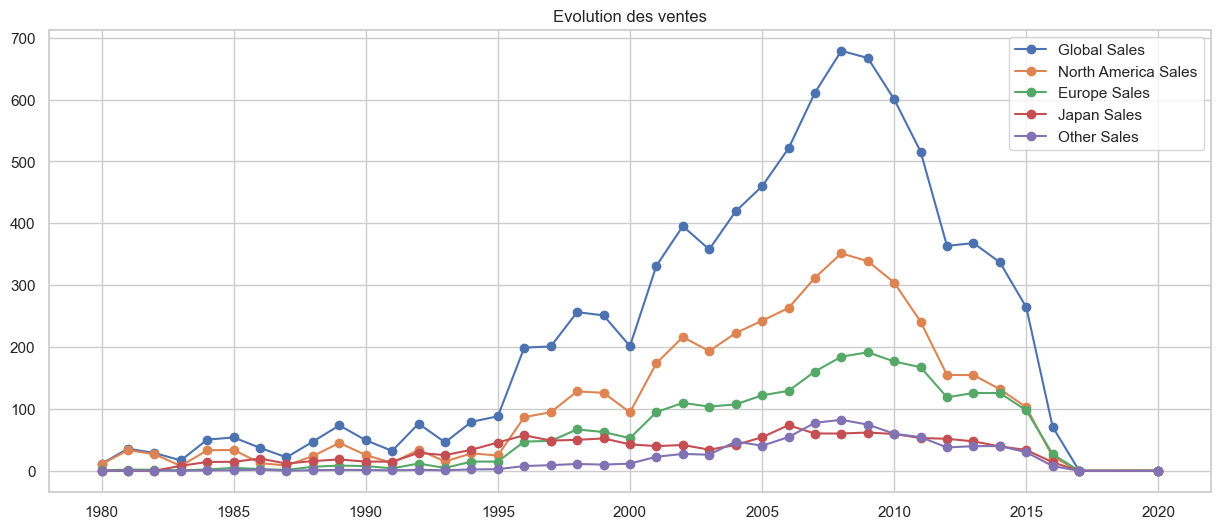

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Global_Sales'].values,
              xdate=True,
              ls='-',
              label='Global Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['NA_Sales'].values,
              xdate=True,
              ls='-',
              label='North America Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['EU_Sales'].values,
              xdate=True,
              ls='-',
              label='Europe Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['JP_Sales'].values,
              xdate=True,
              ls='-',
              label='Japan Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Other_Sales'].values,
              xdate=True,
              ls='-',
              label='Other Sales')
plt.legend(loc='best')
plt.title('Evolution des ventes')
plt.show();

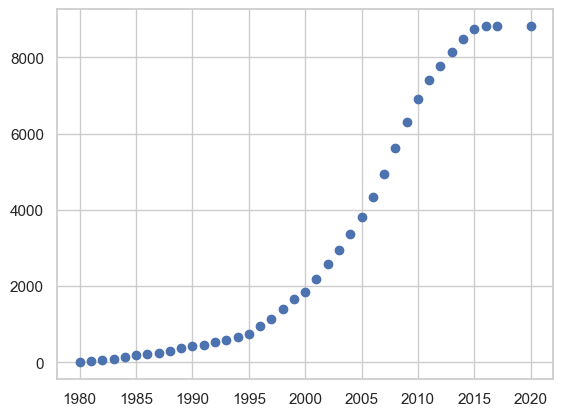

In [16]:
# ANALYSE DE LA TENDANCE DES VENTES GLOBALES

# Calcul des ventes totales
total_sales = df.groupby('Year')['Global_Sales'].sum()

# Calcul des ventes totales cumulées
cumulative_total_sales = total_sales.cumsum()

# Affichage de la série temporelle
plt.plot_date(cumulative_total_sales.index, cumulative_total_sales.values);

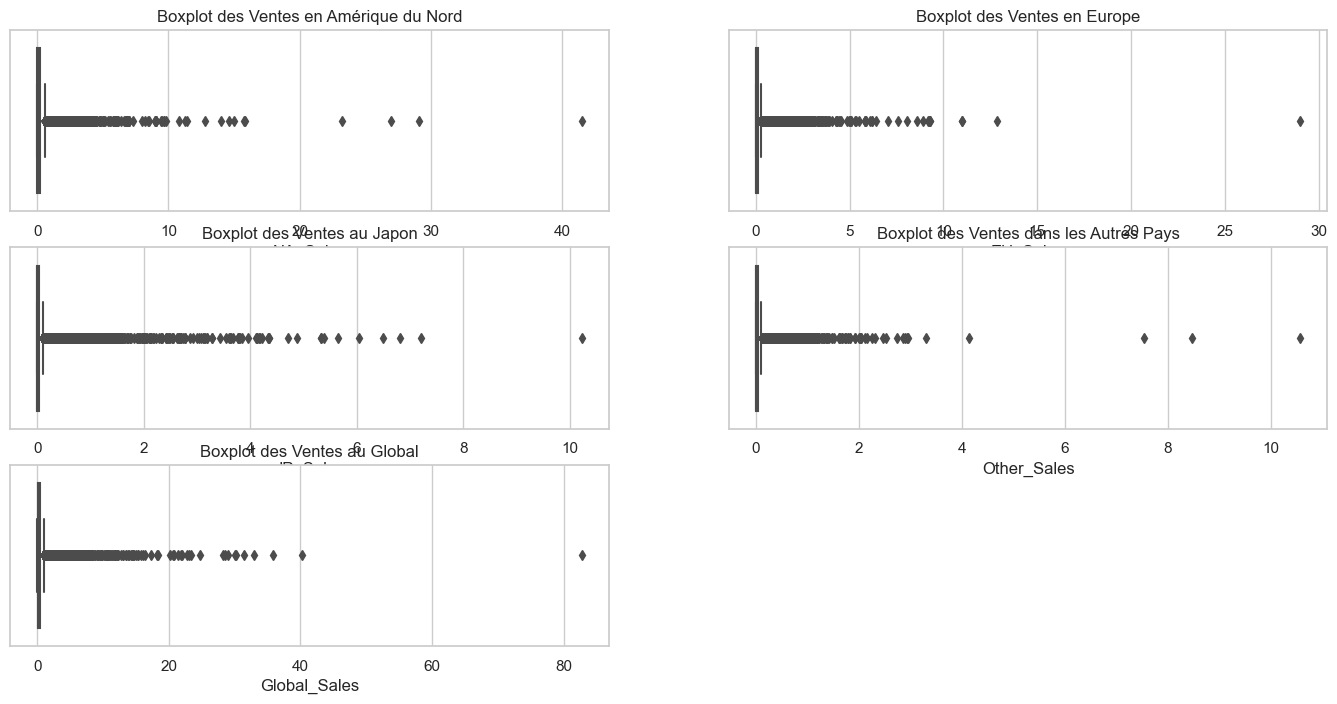

In [17]:
plt.figure(figsize = (17,8))

plt.subplot(321)
sns.boxplot(x = 'NA_Sales', data = df);
plt.title('Boxplot des Ventes en Amérique du Nord')

plt.subplot(322)
sns.boxplot(x = 'EU_Sales', data = df)
plt.title('Boxplot des Ventes en Europe');

plt.subplot(323)
sns.boxplot(x = 'JP_Sales', data = df);
plt.title('Boxplot des Ventes au Japon')

plt.subplot(324)
sns.boxplot(x = 'Other_Sales', data = df)
plt.title('Boxplot des Ventes dans les Autres Pays');

plt.subplot(325)
sns.boxplot(x = 'Global_Sales', data = df);
plt.title('Boxplot des Ventes au Global');


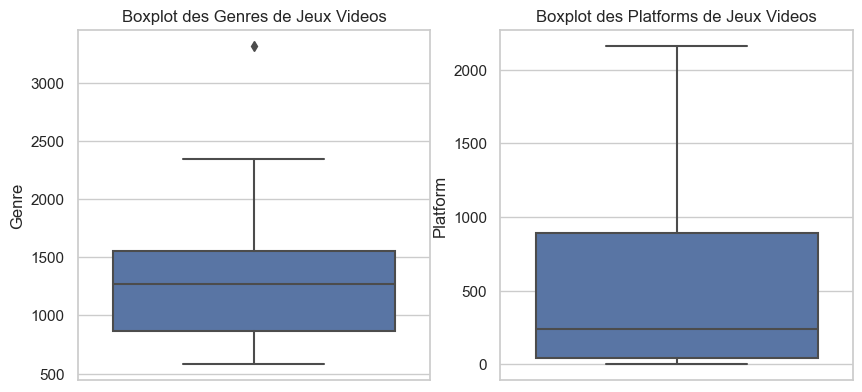

In [18]:
Genre_count=pd.DataFrame(df['Genre'].value_counts())
Platform_count=pd.DataFrame(df['Platform'].value_counts())

plt.figure(figsize = (10,10))

plt.subplot(221)
sns.boxplot(y = 'Genre', data = Genre_count);
plt.title('Boxplot des Genres de Jeux Videos')

plt.subplot(222)
sns.boxplot(y = 'Platform', data = Platform_count)
plt.title('Boxplot des Platforms de Jeux Videos');


In [19]:
# TESTS DE CORRELATION ENTRE LE GLOBAL ET NA_SALES

from scipy.stats import pearsonr

pd.DataFrame(pearsonr(sales_per_year['Global_Sales'], sales_per_year['NA_Sales']), index = ['pearson_coeff', 'p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,9.923798e-01
p-value,2.970512e-35


In [20]:
# TESTS DE CORRELATION ENTRE LE GLOBAL ET EU_SALES

from scipy.stats import pearsonr

pd.DataFrame(pearsonr(sales_per_year['Global_Sales'], sales_per_year['EU_Sales']), index = ['pearson_coeff', 'p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,9.858848e-01
p-value,2.524109e-30


In [21]:
# TESTS DE CORRELATION ENTRE LE GLOBAL ET JP_SALES

from scipy.stats import pearsonr

pd.DataFrame(pearsonr(sales_per_year['Global_Sales'], sales_per_year['JP_Sales']), index = ['pearson_coeff', 'p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,8.518527e-01
p-value,6.151402e-12


In [22]:
# TESTS DE CORRELATION ENTRE LE GLOBAL ET OTHER_SALES

from scipy.stats import pearsonr

pd.DataFrame(pearsonr(sales_per_year['Global_Sales'], sales_per_year['Other_Sales']), index = ['pearson_coeff', 'p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,9.680121e-01
p-value,8.129014e-24


c:\Users\debor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


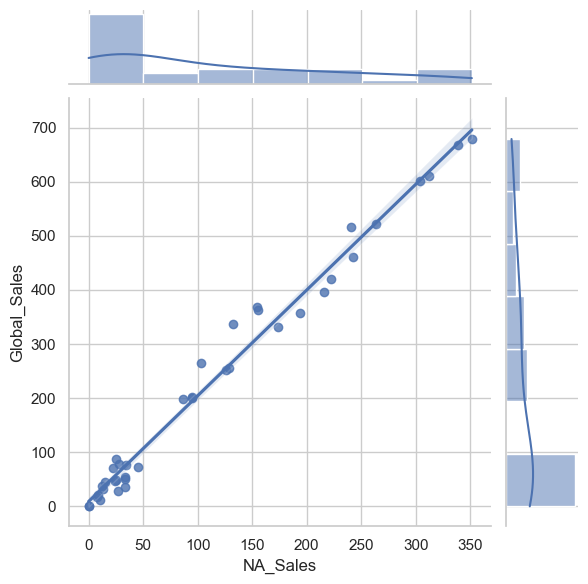

In [23]:
sns.jointplot('NA_Sales', 'Global_Sales', data = sales_per_year, kind = 'reg');

c:\Users\debor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


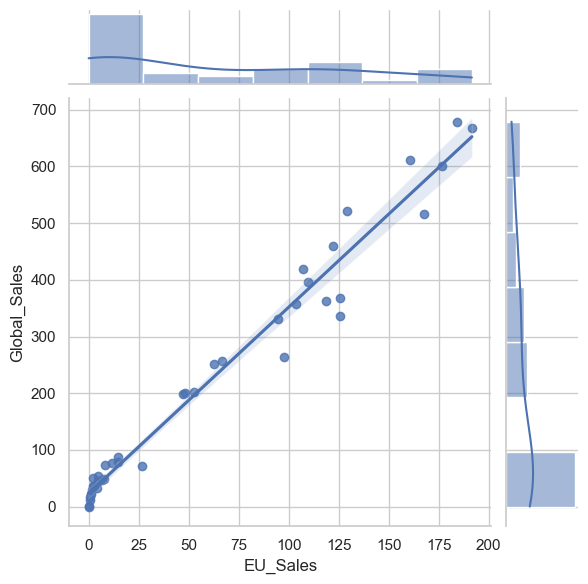

In [24]:
sns.jointplot('EU_Sales', 'Global_Sales', data = sales_per_year, kind = 'reg');

c:\Users\debor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


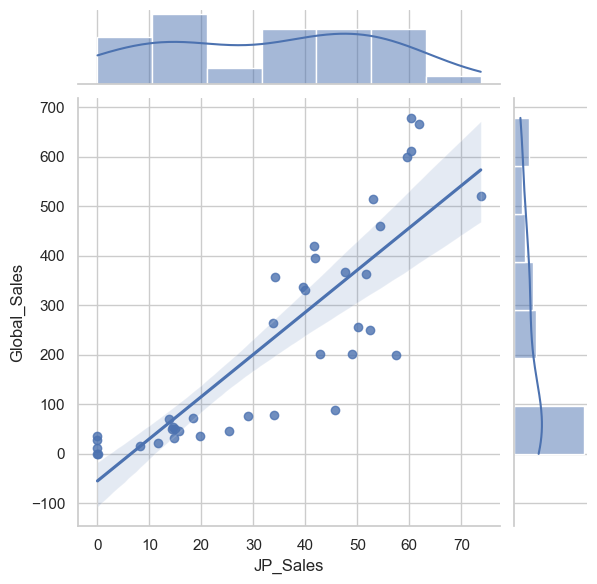

In [25]:
sns.jointplot('JP_Sales', 'Global_Sales', data = sales_per_year, kind = 'reg');

c:\Users\debor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


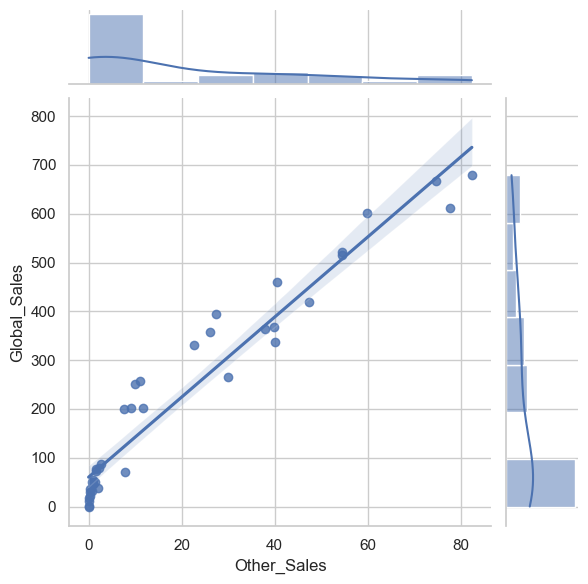

In [26]:
sns.jointplot('Other_Sales', 'Global_Sales', data = sales_per_year, kind = 'reg');